In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
print("THIS SHIT IS REAL")

THIS SHIT IS REAL


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
print(train.shape)
print(test.shape)

(262144, 258)
(131072, 257)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Columns: 257 entries, id to gamy-white-monster-expert
dtypes: float64(255), int64(1), object(1)
memory usage: 257.0+ MB


In [7]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

In [8]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

In [9]:
sample.head()

,id,target
0,ba88c155ba898fc8b5099893036ef205,0.5
1,7cbab5cea99169139e7e6d8ff74ebb77,0.5
2,7baaf361537fbd8a1aaa2c97a6d4ccc7,0.5
3,2e1350fe94ec9f2220bec5245e5e9265,0.5
4,626ce222351b68b259f73de172f11249,0.5


In [10]:
test_id = test['id']
test.drop(['id'], axis=1, inplace=True)
train.drop(['id'], axis=1, inplace=True)
print(train.shape)
print(test.shape)

(262144, 257)
(131072, 256)


In [11]:
print(train.columns)

Index(['muggy-smalt-axolotl-pembus', 'dorky-peach-sheepdog-ordinal',
       'slimy-seashell-cassowary-goose',
       'snazzy-harlequin-chicken-distraction', 'frumpy-smalt-mau-ordinal',
       'stealthy-beige-pinscher-golden', 'chummy-cream-tarantula-entropy',
       'hazy-emerald-cuttlefish-unsorted', 'nerdy-indigo-wolfhound-sorted',
       'leaky-amaranth-lizard-sorted',
       ...
       'wheezy-myrtle-mandrill-entropy', 'wiggy-lilac-lemming-sorted',
       'gloppy-cerise-snail-contributor', 'woozy-silver-havanese-gaussian',
       'jumpy-thistle-discus-sorted', 'muggy-turquoise-donkey-important',
       'blurry-buff-hyena-entropy', 'bluesy-chocolate-kudu-fepid',
       'gamy-white-monster-expert', 'target'],
      dtype='object', length=257)


# Missing Values

In [12]:
train.isnull().sum().sum()

0

In [13]:
test.isnull().sum().sum()

0

# No NULLS
.

# Correlations

<AxesSubplot:>

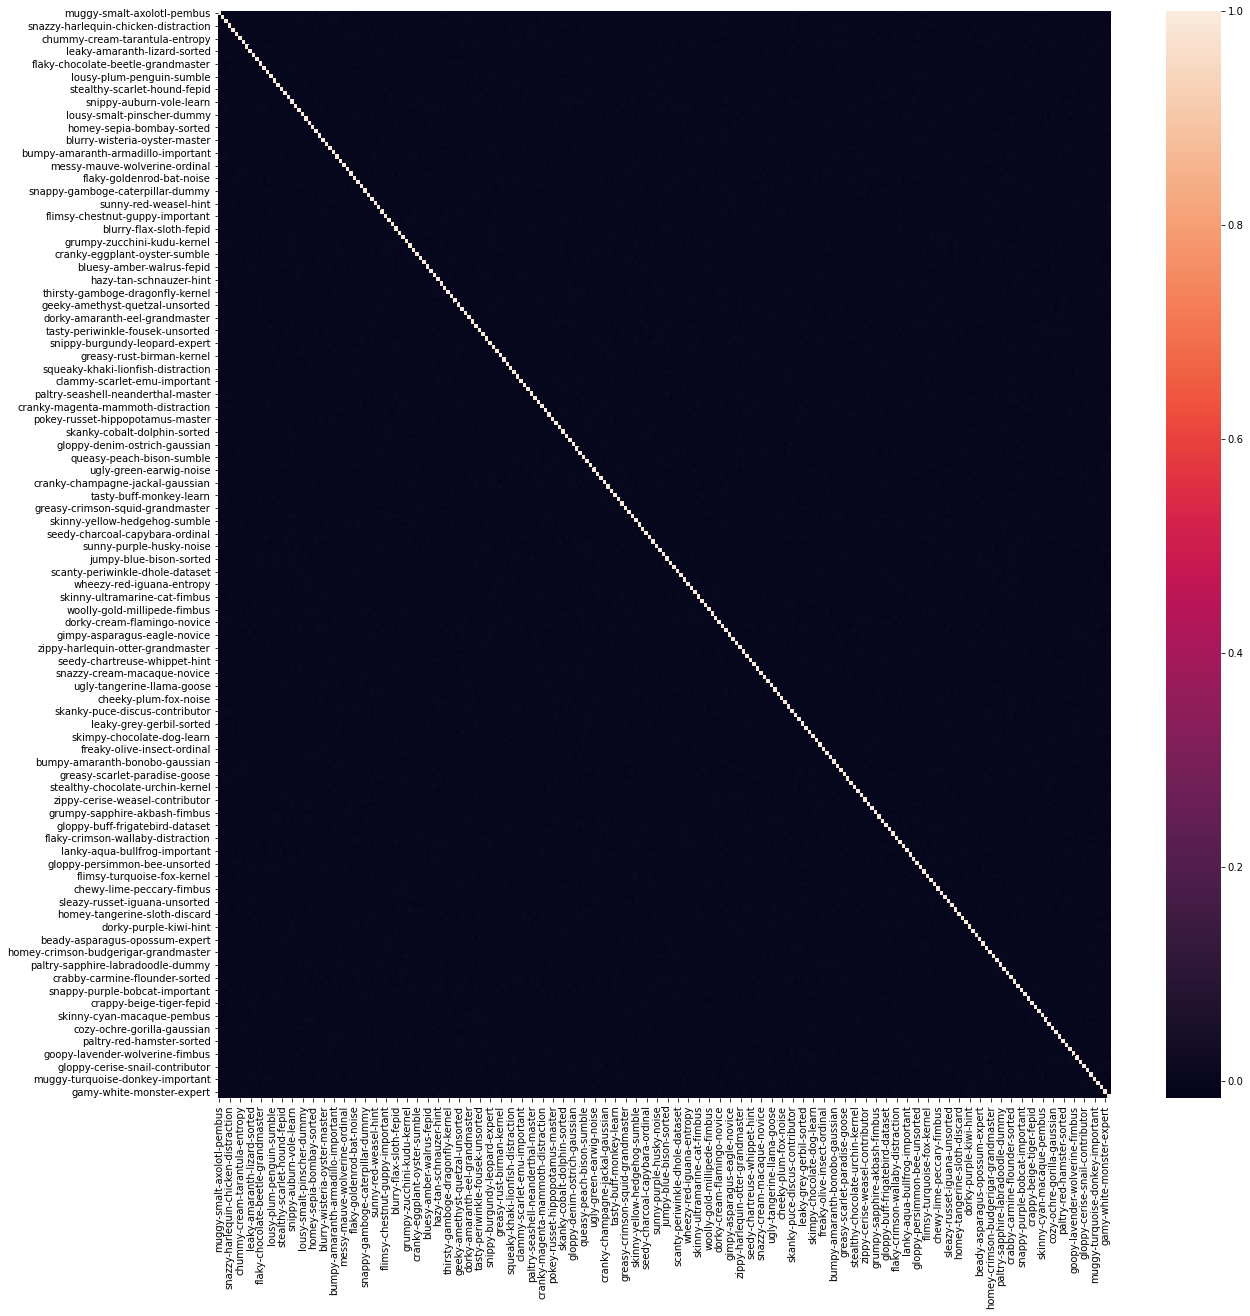

In [14]:
corr = train.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(corr)

In [15]:
corr[-10:]

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

# Skewness

<AxesSubplot:xlabel='target', ylabel='Density'>

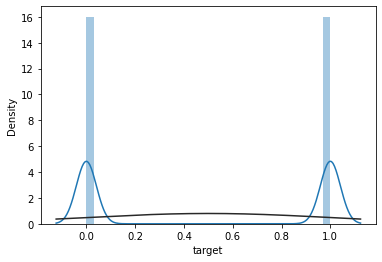

In [16]:
sns.distplot(train['target'], fit=norm)

In [17]:
skewness = train.skew()
skewness[:20]

muggy-smalt-axolotl-pembus              0.075710
dorky-peach-sheepdog-ordinal            0.002101
slimy-seashell-cassowary-goose         -0.042592
snazzy-harlequin-chicken-distraction   -0.019688
frumpy-smalt-mau-ordinal               -0.000492
stealthy-beige-pinscher-golden          0.083005
chummy-cream-tarantula-entropy         -0.057529
hazy-emerald-cuttlefish-unsorted       -0.006099
nerdy-indigo-wolfhound-sorted          -0.023839
leaky-amaranth-lizard-sorted            0.199337
ugly-tangerine-chihuahua-important      0.006290
shaggy-silver-indri-fimbus              0.026554
flaky-chocolate-beetle-grandmaster      0.032742
squirrely-harlequin-sheep-sumble        0.041795
freaky-tan-angelfish-noise              0.073267
lousy-plum-penguin-sumble              -0.109383
bluesy-rose-wallaby-discard             0.090738
baggy-copper-oriole-dummy               0.013765
stealthy-scarlet-hound-fepid           -0.030131
greasy-cinnamon-bonobo-contributor     -0.021897
dtype: float64

In [18]:
skewness[-1]

-0.0009002737973103305

# No Skewness
.

In [19]:
train.dtypes

muggy-smalt-axolotl-pembus              float64
dorky-peach-sheepdog-ordinal            float64
slimy-seashell-cassowary-goose          float64
snazzy-harlequin-chicken-distraction    float64
frumpy-smalt-mau-ordinal                float64
                                         ...   
muggy-turquoise-donkey-important        float64
blurry-buff-hyena-entropy               float64
bluesy-chocolate-kudu-fepid             float64
gamy-white-monster-expert               float64
target                                    int64
Length: 257, dtype: object

In [20]:
if 'ojbect' in train.dtypes:
    print(True)
else:
    print(False)

False


# No Need to encode categorical data
.

In [21]:
target = train['target']
train.drop(['target'], axis=1, inplace=True)
print(train.shape)
print(test.shape)

(262144, 256)
(131072, 256)


In [22]:
train.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

In [23]:
test.head()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

# Modelling

In [29]:
# XGBoost
model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
model_xgb.fit(train, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
              scale_pos_weight=1, subsample=0.5213, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [26]:
# RandomForest
model_rf = RandomForestClassifier(n_estimators=150, max_depth=50)
model_rf.fit(train, target)

RandomForestClassifier(max_depth=50, n_estimators=150)

In [27]:
# Lightgbm
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(train, target)

LGBMClassifier()

In [30]:
y_pred_xgb = model_xgb.predict_proba(test)

In [31]:
y_pred_rf = model_rf.predict_proba(test)

In [32]:
y_pred_lgb = model_lgb.predict_proba(test)

In [33]:
y_pred_xgb[:, 1]

array([0.5037749 , 0.5061497 , 0.52356654, ..., 0.5344197 , 0.48760182,
       0.5115449 ], dtype=float32)

In [34]:
y_pred_rf[:, 1]

array([0.75204887, 0.76729543, 0.80022699, ..., 0.47461461, 0.52642683,
       0.49471236])

In [35]:
y_pred_lgb[:, 1]

array([0.47533368, 0.50922804, 0.5540372 , ..., 0.48294089, 0.49289948,
       0.50962715])

In [39]:
sub1, sub2, sub3 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
sub1['id'], sub2['id'], sub3['id'] = test_id, test_id, test_id
sub1['target'], sub2['target'], sub3['target'] = y_pred_xgb[:, 1], y_pred_rf[:, 1], y_pred_lgb[:, 1]
sub1.to_csv('submission_xgb.csv', index=False)
sub2.to_csv('submission_rf.csv', index=False)
sub3.to_csv('submission_lgb.csv', index=False)

In [40]:
y_pred_xgb

array([[0.49622512, 0.5037749 ],
       [0.4938503 , 0.5061497 ],
       [0.47643346, 0.52356654],
       ...,
       [0.46558028, 0.5344197 ],
       [0.5123982 , 0.48760182],
       [0.48845512, 0.5115449 ]], dtype=float32)